# Sayan Kumar
# Task 1: Prediction using supervised ML
# (Predict the percentage of a student based on the no of study hours)
# Sparks Foundation

In [1]:
#importing librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
#importing and reading datasets
df = pd.read_csv("student_scores - student_scores.csv")
# print first 5 values of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# number of rows and colomns
df.shape

(25, 2)

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# visualisation of data 

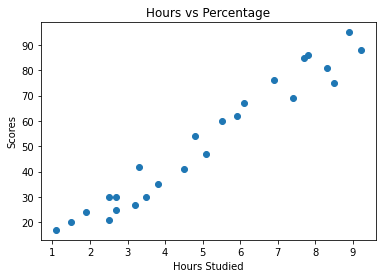

In [5]:
# Hours vs Percentage of Scores
plt.scatter(df["Hours"],df["Scores"])
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.show()

# train test split method

In [6]:
#X will take all the values except for the last column which is our dependent variable (target variable)
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [7]:
from sklearn.model_selection import train_test_split  
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

# Training the Simple Linear Regression model on the Training set

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

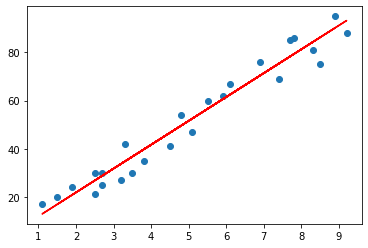

In [9]:
# plotting the regression line for test data 
plt.scatter(x,y)
plt.plot(x,regr.coef_*x+regr.intercept_,color="red")
plt.show()

In [10]:
# Predicting the Test set results
print(test_x)
y_pred = regr.predict(test_x)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing the actual values with the predicted ones.
df= pd.DataFrame({"Actual": test_y, "Predicted": y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
# predicting the score 
hours= np.array(9.25)
hours= hours.reshape(-1,1)
pred = regr.predict(hours)
print("If students study for 9.25 hours/day, the score is {}".format(pred[0]))

If students study for 9.25 hours/day, the score is 93.69173248737538


In [63]:
from sklearn.metrics import r2_score
print("R2_score is of the model is :", r2_score(test_y,y_pred))

R2_score is of the model is : 0.9454906892105356


# error metrics

In [64]:
from sklearn import metrics
print("Mean Absolute error is :", metrics.mean_absolute_error(y_pred,test_y))

Mean Absolute error is : 4.183859899002975


# Conclusion

# We used a Linear Regression Model to predict the score of a student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91.